In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.utils import to_categorical
from keras.models import load_model
import random as rd
import collections as clt

In [2]:
import module
import importlib
importlib.reload(module)

<module 'module' from 'C:\\Users\\Admin\\Documents\\Anaconda\\Project4-EdgeEval\\module.py'>

In [3]:
browser = 'firefox'

In [4]:
train_data, train_index, test_data, test_index = module.load_data('F:/data_' + browser + '/3_data/data.csv')
model = load_model('F:/data_' + browser + '/4_result/model_cnn.h5')

data shape: (10000, 1002)
train data shape: (8000, 500)
test data shape: (2000, 500)


In [5]:
#list defense insert
list_data_insert = np.array([])

p_list = np.linspace(0, 100, 21)

for p in range(21):
    output_data = module.list_defense_insert(test_data, p_list[p], train_data)
    if len(list_data_insert) == 0:
        list_data_insert = output_data
    else:
        list_data_insert = np.append(list_data_insert, output_data, axis=0)
    
#list defense divide
list_data_divide = np.array([])
p_real = np.array([])

p_list = np.linspace(0, 100, 21)

for p in range(21):
    output_data, p_real_single = module.list_defense_divide(test_data, p_list[p], train_data)
    if len(list_data_divide) == 0:
        list_data_divide = output_data
        p_real = p_real_single
    else:
        list_data_divide = np.append(list_data_divide, output_data, axis=0)
        p_real = np.append(p_real, p_real_single)

In [6]:
list_result_insert = np.zeros((1, 21))
for i in range(1):
    for j in range(21):
        test_data_single = list_data_insert[(i * 21 + j) * 2000 : (i * 21 + j) * 2000 + 2000]
        result_single = module.evaluate(model, test_data_single, test_index)
        list_result_insert[i][j] = result_single[1]
        
list_result_divide = np.zeros((1, 21))
for i in range(1):
    for j in range(21):
        test_data_single = list_data_divide[(i * 21 + j) * 2000 : (i * 21 + j) * 2000 + 2000]
        result_single = module.evaluate(model, test_data_single, test_index)
        list_result_divide[i][j] = result_single[1]

63/63 [==============================] - 3s 43ms/step - loss: 8.8503 - accuracy: 0.1100


In [7]:
filter_data_insert = module.filter_attack(list_data_insert, train_data)
filter_data_divide = module.filter_attack(list_data_divide, train_data)

In [8]:
#filter attack evaluate
filter_result_insert = np.zeros((1, 21))
for i in range(1):
    for j in range(21):
        test_data_single = filter_data_insert[(i * 21 + j) * 2000 : (i * 21 + j) * 2000 + 2000]
        result_single = module.evaluate(model, test_data_single, test_index)
        filter_result_insert[i][j] = result_single[1]
        
filter_result_divide = np.zeros((1, 21))
for i in range(1):
    for j in range(21):
        test_data_single = filter_data_divide[(i * 21 + j) * 2000 : (i * 21 + j) * 2000 + 2000]
        result_single = module.evaluate(model, test_data_single, test_index)
        filter_result_divide[i][j] = result_single[1]

63/63 [==============================] - 3s 41ms/step - loss: 6.0757 - accuracy: 0.1670


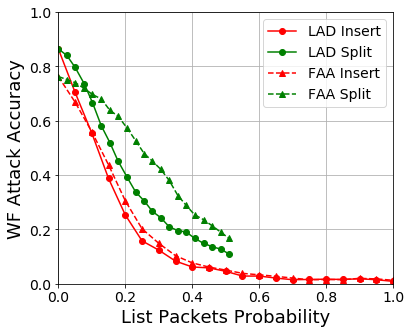

In [9]:
plt.figure(figsize=(6,5))
plt.plot(p_list/100, list_result_insert[0], 'ro-')
plt.plot(p_real/100, list_result_divide[0], 'go-')

plt.plot(p_list/100, filter_result_insert[0], 'r^--')
plt.plot(p_real/100, filter_result_divide[0], 'g^--')

plt.xlabel('List Packets Probability', fontsize=18)
plt.ylabel('WF Attack Accuracy', fontsize=18)
plt.legend(['LAD Insert', 'LAD Split', 'FAA Insert', 'FAA Split'], fontsize=14)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('C:/Users/Admin/Desktop/list_filter_' + browser + '.pdf', bbox_inches = 'tight')

In [10]:
print(np.average(list_result_insert[0]))
print(np.average(list_result_divide[0]))
print(np.average(filter_result_insert[0]))
print(np.average(filter_result_divide[0]))

0.16576190452490533
0.39476190152622403
0.17116666571902378
0.4815476196152823
